# Lesions Detection:
Submitted by: Vishal Singh (singhvishal0304@gmail.com)
## Dataset
This model is trained over MNIST HAM10000 dataset  link: https://www.isic-archive.com/#!/onlyHeaderTop/gallery which contains lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file. The data is splitted into train and test set with 80/20 ratio.
The model classifies the lesions detected into the seven categories : Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

## Model
The model use Convolutional Neural Networks. The starting two layer and last layers contain 32 filters and 64 filters respectively. Model uses drop-out three times to avoid overfitting. Maxpooling is used 2 times to downsample the image. All intermediate layers use relu activation and final layer uses softmax activation.

## Implementational Details
Keras is used to implement the CNN. The model is trained on Google Colab which uses K80 GPU. The learning rate is started with a larger value then gradually decreased over time. This is due to the intuition to explore loss function in deep.

## Result
The model has 92.8 % accuracy on test data.

# Future Scope
This problem can also be approached with 2 stage Machine Learning Method. Image processing techniques can serve in data processing and  feature extraction. Artificial Neural Network can be used as the second stage for the lesions detection. The comparison between results of both the approach may give novel instincts.

In [0]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image

from warnings import filterwarnings

np.random.seed(101)
filterwarnings('ignore')
sns.set_style('darkgrid')

**Setting data path**

In [47]:
base_loc = '{/content}/datasets/kmader/skin-cancer-mnist-ham10000'
image_paths = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_loc, '*.jpg'))}
image_paths

{'ISIC_0033762': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0033762.jpg',
 'ISIC_0025523': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0025523.jpg',
 'ISIC_0026923': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0026923.jpg',
 'ISIC_0027730': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0027730.jpg',
 'ISIC_0029140': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0029140.jpg',
 'ISIC_0028686': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0028686.jpg',
 'ISIC_0033238': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0033238.jpg',
 'ISIC_0024438': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0024438.jpg',
 'ISIC_0032572': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0032572.jpg',
 'ISIC_0034043': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0034043.jpg',
 'ISIC_0027445': '{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0027445.jpg',

In [38]:
%cd /

/


In [7]:
%cd {/content}/datasets/kmader/skin-cancer-mnist-ham10000

/{/content}/datasets/kmader/skin-cancer-mnist-ham10000


In [8]:
!unzip skin-cancer-mnist-ham10000.zip

Archive:  skin-cancer-mnist-ham10000.zip
  inflating: hmnist_28_28_RGB.csv    
  inflating: HAM10000_metadata.csv   
  inflating: HAM10000_images_part_1.zip  
  inflating: hmnist_28_28_L.csv      
  inflating: hmnist_8_8_L.csv        
  inflating: HAM10000_images_part_2.zip  
  inflating: hmnist_8_8_RGB.csv      


In [10]:
!unzip HAM10000_images_part_1.zip

Archive:  HAM10000_images_part_2.zip
  inflating: ISIC_0029306.jpg        
  inflating: ISIC_0029307.jpg        
  inflating: ISIC_0029308.jpg        
  inflating: ISIC_0029309.jpg        
  inflating: ISIC_0029310.jpg        
  inflating: ISIC_0029311.jpg        
  inflating: ISIC_0029312.jpg        
  inflating: ISIC_0029313.jpg        
  inflating: ISIC_0029314.jpg        
  inflating: ISIC_0029315.jpg        
  inflating: ISIC_0029316.jpg        
  inflating: ISIC_0029317.jpg        
  inflating: ISIC_0029318.jpg        
  inflating: ISIC_0029319.jpg        
  inflating: ISIC_0029320.jpg        
  inflating: ISIC_0029321.jpg        
  inflating: ISIC_0029322.jpg        
  inflating: ISIC_0029323.jpg        
  inflating: ISIC_0029324.jpg        
  inflating: ISIC_0029325.jpg        
  inflating: ISIC_0029326.jpg        
  inflating: ISIC_0029327.jpg        
  inflating: ISIC_0029328.jpg        
  inflating: ISIC_0029329.jpg        
  inflating: ISIC_0029330.jpg        
  inflating: 

In [0]:
!unzip HAM10000_images_part_2.zip

In [12]:
!ls

HAM10000_images_part_1.zip  ISIC_0027640.jpg  ISIC_0030981.jpg
HAM10000_images_part_2.zip  ISIC_0027641.jpg  ISIC_0030982.jpg
HAM10000_metadata.csv	    ISIC_0027642.jpg  ISIC_0030983.jpg
hmnist_28_28_L.csv	    ISIC_0027643.jpg  ISIC_0030984.jpg
hmnist_28_28_RGB.csv	    ISIC_0027644.jpg  ISIC_0030985.jpg
hmnist_8_8_L.csv	    ISIC_0027645.jpg  ISIC_0030986.jpg
hmnist_8_8_RGB.csv	    ISIC_0027646.jpg  ISIC_0030987.jpg
ISIC_0024306.jpg	    ISIC_0027647.jpg  ISIC_0030988.jpg
ISIC_0024307.jpg	    ISIC_0027648.jpg  ISIC_0030989.jpg
ISIC_0024308.jpg	    ISIC_0027649.jpg  ISIC_0030990.jpg
ISIC_0024309.jpg	    ISIC_0027650.jpg  ISIC_0030991.jpg
ISIC_0024310.jpg	    ISIC_0027651.jpg  ISIC_0030992.jpg
ISIC_0024311.jpg	    ISIC_0027652.jpg  ISIC_0030993.jpg
ISIC_0024312.jpg	    ISIC_0027653.jpg  ISIC_0030994.jpg
ISIC_0024313.jpg	    ISIC_0027654.jpg  ISIC_0030995.jpg
ISIC_0024314.jpg	    ISIC_0027655.jpg  ISIC_0030996.jpg
ISIC_0024315.jpg	    ISIC_0027656.jpg  ISIC_0030997.jpg
ISIC_0024316.jpg	    

In [48]:
df_skin = pd.read_csv(os.path.join(base_loc, 'HAM10000_metadata.csv'))
df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [49]:
df_skin['image_path'] = df_skin['image_id'].map(image_paths.get)
df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,{/content}/datasets/kmader/skin-cancer-mnist-h...


In [50]:
lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df_skin['type'] = df_skin['dx'].map(lesion_types.get)

# Converting the type to the categorical values
df_skin['type_id'] = pd.Categorical(df_skin['type']).codes

df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,type,type_id
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2


In [51]:
print(np.asarray(Image.open(df_skin['image_path'][0]).resize((100,75)))[:4])

[[[191 153 194]
  [191 154 198]
  [189 152 193]
  ...
  [192 153 158]
  [193 155 168]
  [198 158 169]]

 [[190 143 187]
  [190 148 184]
  [191 155 193]
  ...
  [193 152 156]
  [194 152 166]
  [191 153 164]]

 [[189 155 190]
  [193 156 190]
  [194 158 196]
  ...
  [192 152 152]
  [193 149 150]
  [186 140 143]]

 [[195 163 200]
  [199 162 203]
  [196 157 202]
  ...
  [194 155 156]
  [191 153 166]
  [184 145 172]]]


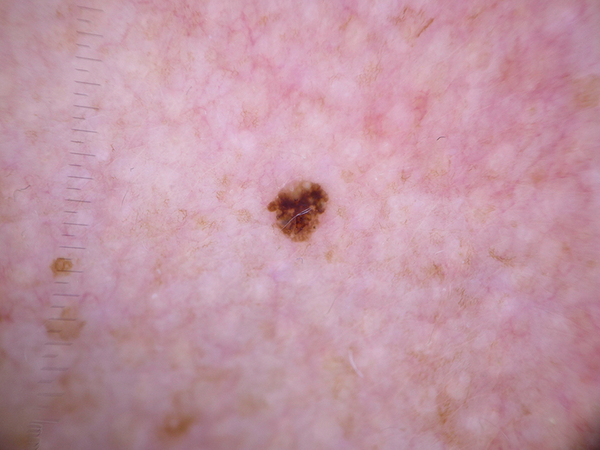

In [91]:
Image.open(df_skin['image_path'][16])

In [0]:
df_skin['image'] = df_skin['image_path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [54]:
df_skin.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,type,type_id,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2,"[[[191, 153, 194], [191, 154, 198], [189, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2,"[[[23, 13, 22], [25, 15, 24], [24, 16, 31], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2,"[[[186, 126, 136], [190, 136, 149], [195, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2,"[[[24, 11, 18], [27, 13, 26], [39, 23, 33], [6..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,{/content}/datasets/kmader/skin-cancer-mnist-h...,Benign keratosis-like lesions,2,"[[[136, 91, 114], [148, 104, 127], [161, 117, ..."


In [0]:
features = df_skin.drop(columns=['type_id'],axis=1)
target = df_skin['type_id']

**Splitting data in 80/20 ratio**

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test_ = train_test_split(features, target, test_size = 0.20, random_state = 101)
print('The length of training Set is {}\nThe length of the test set is {}\nThe ratio is {}'.format(len(X_train), len(X_test), '80/20'))

The length of training Set is 8012
The length of the test set is 2003
The ratio is 80/20


**Normalizing**

In [0]:
X_train = np.asarray(X_train_['image'].tolist())
X_test = np.asarray(X_test_['image'].tolist())
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [59]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


One Hot Encoding

In [0]:
y_train = to_categorical(y_train_, num_classes= 7)
y_test = to_categorical(y_test_, num_classes= 7)

In [61]:
y_test[:10]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

**Proposed model**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [63]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'Same', input_shape = (75, 100, 3)))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(MaxPool2D(pool_size= (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'Same'))
model.add(MaxPool2D(pool_size= (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation= 'softmax'))
model.summary()

W0615 07:17:46.599867 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 07:17:46.675040 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 07:17:46.696977 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 07:17:46.749273 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 07:17:46.754228 140661439448960 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)        0         
__________

In [64]:
model.compile(Adam(), loss = 'categorical_crossentropy', metrics = ['mae', 'acc'])


W0615 07:18:47.029574 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 07:18:47.038236 140661439448960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
annealer = ReduceLROnPlateau(monitor= 'val_acc')

In [66]:
mod = model.fit(x = X_train, y = y_train, epochs= 50, callbacks= [annealer])

W0615 07:19:46.090147 140661439448960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
8012/8012 [==============================] - 14s 2ms/step - loss: 1.0635 - mean_absolute_error: 0.1361 - acc: 0.6629
Epoch 2/50
8012/8012 [==============================] - 6s 767us/step - loss: 0.9067 - mean_absolute_error: 0.1227 - acc: 0.6787
Epoch 3/50
8012/8012 [==============================] - 6s 775us/step - loss: 0.8618 - mean_absolute_error: 0.1186 - acc: 0.6857
Epoch 4/50
8012/8012 [==============================] - 6s 771us/step - loss: 0.8045 - mean_absolute_error: 0.1122 - acc: 0.7027
Epoch 5/50
8012/8012 [==============================] - 6s 770us/step - loss: 0.7763 - mean_absolute_error: 0.1093 - acc: 0.7136
Epoch 6/50
8012/8012 [==============================] - 6s 777us/step - loss: 0.7547 - mean_absolute_error: 0.1074 - acc: 0.7225
Epoch 7/50
8012/8012 [==============================] - 6s 776us/step - loss: 0.7195 - mean_absolute_error: 0.1029 - acc: 0.7346
Epoch 8/50
8012/8012 [==============================] - 6s 783us/step - loss: 0.6850 - mean_absolu

In [0]:
model.save('skin.h5')

**Prediction**

In [0]:
from keras.models import load_model
model = load_model('skin.h5')

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
imagePath='{/content}/datasets/kmader/skin-cancer-mnist-ham10000/ISIC_0024312.jpg'

In [0]:
from keras.preprocessing import image

test_image = image.load_img(imagePath, target_size = (75,100)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)

In [80]:
result

array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

**Evaluating Model**

In [86]:
loss,acc = model.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

2003/2003 [==============================] - 1s 344us/step
The accuracy of the model is 0.928
The Loss in the model is 0.302


**Visualizing Curves**

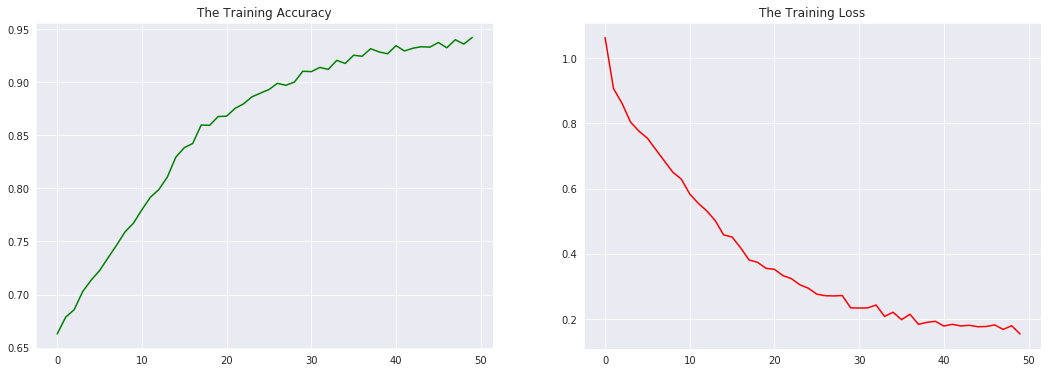

In [90]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(mod.history['acc'], color = 'green')
plt.title('The Training Accuracy')
plt.subplot(1,2,2)
plt.plot(mod.history['loss'], color = 'red')
plt.title('The Training Loss')
plt.show()